# Addendum - Logistic Regression

This file uses the SoftmaxRegression class as implemented in the homework instead of the library for comparison's sake.

In [1]:
%run preprocessing_lean.ipynb
%run visuals.ipynb

In [2]:
ALPHA = 0.01
BATCH_SIZE = 64
EPOCHS = 100
SEED = 42

In [3]:
import numpy as np

def softmax(z: np.ndarray) -> np.ndarray:
    z_max = np.max(np.atleast_2d(z), axis=1)
    exponentiated_values = np.exp(z - z_max[:, np.newaxis])
    denominator = np.sum(exponentiated_values, axis=1)

    return exponentiated_values / denominator[:, np.newaxis]

In [4]:
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    return (-1/probs.shape[0]) * np.sum(y*np.log(probs))

In [5]:
from typing import List

def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [6]:
class SoftmaxRegression():
    """ Performs softmax regression using gradient descent
    
        Attributes:

            alpha: learning rate or step size.
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent.
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            W: Matrix of weights with shape (M, K) 

            trn_loss: Stores the training loss for each epoch.

            vld_loss: Stores the validation loss for each epoch.
    """
    def __init__(
        self, 
        alpha: float,
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):

        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        
        self.W = None
        self.trn_loss = None
        self.vld_loss = None
    
    def fit(
         self, 
         X: np.ndarray, 
         y: np.ndarray, 
         X_vld: np.ndarray=None, 
         y_vld: np.ndarray=None
     ) -> object:
        """ Trains softmax regressio using SGD
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector

                X_vld: Validation data given as a 2D matrix. Used 
                    to compute the validation accuracy for each epoch.

                y_vld: Validation labels given as a 2D matrix. Used 
                    to compute the validation accuracy for each epoch.
                
            Returns:
                The class's own object reference. 
        """
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training/validation loss
        self.trn_loss = []
        self.vld_loss = []

        self.W = np.random.rand(X.shape[1], y.shape[1])
        
        # TODO 7.1
        for _ in range(self.epochs):
            batches = get_batches(X.shape[0], self.batch_size)
            for b in batches:
                self.W -= self.alpha * (1/len(b)) * (X[b].T @ (softmax(X[b] @ self.W) - y[b]))

            trn_probs = softmax(X @ self.W)
            trn_loss = nll_loss(y, trn_probs)
            self.trn_loss.append(trn_loss)
            
            if X_vld is not None and y_vld is not None:
                vld_probs = softmax(X_vld @ self.W)
                vld_loss = nll_loss(y_vld, vld_probs)
                self.vld_loss.append(vld_loss)
        
        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        # TODO 7.2
        return softmax(X @ self.W)

In [7]:
'''
Refit data to the format this version of the algorithm expects
'''

from sklearn.preprocessing import OneHotEncoder

y_trn = y_trn.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_tst = y_tst.reshape(-1, 1)

ohe = OneHotEncoder(sparse_output=False)
y_trn = ohe.fit_transform(y_trn)
y_val = ohe.fit_transform(y_val)
y_tst = ohe.fit_transform(y_tst)

Training accuracy: 0.766302178944848


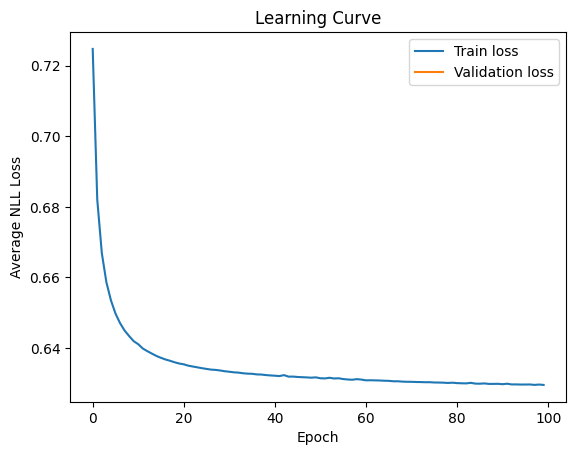

In [8]:
import matplotlib.pyplot as plt

model = SoftmaxRegression(epochs=EPOCHS, batch_size=BATCH_SIZE, alpha=ALPHA, seed=SEED)
model.fit(X_trn, y_trn)

print("Training accuracy:", accuracy_score(np.argmax(y_trn, axis=1), np.argmax(model.predict(X_trn), axis=1)))
plt.plot(model.trn_loss, label='Train loss')
plt.plot(model.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

,Dataset,Accuracy
0,Training,0.766302
1,Validation,0.765483
2,Test,0.767125


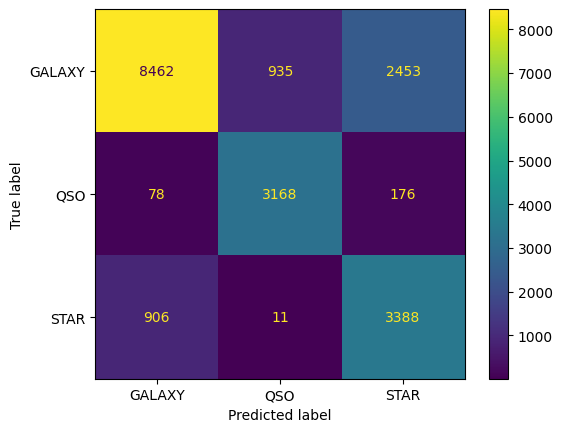

In [9]:
y_trn = np.argmax(y_trn, axis=1)
y_val = np.argmax(y_val, axis=1)
y_tst = np.argmax(y_tst, axis=1)

generate_statistics(model.predict, single_output=False)